# Data Cleaning

## Importing and Formatting

In [1]:
# importing necessary libraries
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string

In [2]:
# querying the mongodb
client = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db = client.ad_database
collection = db.new_ad_collection

In [3]:
# storing everything in a list
data = []
for x in collection.find({}):
    data.append(x)

In [4]:
# converting the list to a dataframe. peep the embarassing column that stems from a spelling error!
df = pd.DataFrame(data)
df.head()

,_id,brand,country,description,headline,img_url,indsutry,industry,medium,url
0,5cf6c6647f233834c8a841b3,Enable Foundation,NaN,“Surreal is real in dementia” is an awareness ...,NaN,http://www.welovead.com/upload/photo_db/2019/0...,NaN,Public interest & Non-profit,Ambient & Interactive,http://www.welovead.com/en/works/details/e70wh...
1,5cf6c6657f233834c8a841b4,Tzabar,Israel,NaN,Roger Waters Live in Paris 3 nights + concert ...,http://www.welovead.com/upload/photo_db/2011/0...,NaN,Transport & Tourism,Print,http://www.welovead.com/en/works/details/67bCesqz
2,5cf6c6667f233834c8a841b5,Union Insurance Company,Slovakia,NaN,NaN,http://www.welovead.com/upload/photo_db/2010/0...,NaN,Financial & Legal services,Ambient & Interactive,http://www.welovead.com/en/works/details/ff3Bkqvz
3,5cf6c6677f233834c8a841b6,Infiniti,United States,NaN,Accelerating the future.,http://www.welovead.com/upload/photo_db/2009/0...,NaN,Automotive & Services,Print,http://www.welovead.com/en/works/details/0c7ygstC
4,5cf6c6687f233834c8a841b7,Guinness,United Kingdom,NaN,NaN,http://www.welovead.com/upload/photo_db/2009/0...,NaN,Alcoholic drinks,Outdoor,http://www.welovead.com/en/works/details/528xlpvC


## Column & Data Removal

In [5]:
# removing everything that isn't needed
df = df.drop(['_id', 'img_url', 'url', 'indsutry'], axis=1)

In [6]:
# checking for rows that are missing all text data
len(df[(df.headline.isnull()) & (df.description.isnull())])

57441

In [7]:
# checking for null values on every column
df.isnull().sum()

brand           19346
country         13690
description    104351
headline        90224
industry           36
medium           3945
dtype: int64

In [8]:
# dropping records that have no text data
new = df.dropna(subset=['description', 'headline'], how='all')

In [9]:
new.head()

,brand,country,description,headline,industry,medium
0,Enable Foundation,NaN,“Surreal is real in dementia” is an awareness ...,NaN,Public interest & Non-profit,Ambient & Interactive
1,Tzabar,Israel,NaN,Roger Waters Live in Paris 3 nights + concert ...,Transport & Tourism,Print
3,Infiniti,United States,NaN,Accelerating the future.,Automotive & Services,Print
5,Toyota,Canada,NaN,Official ride of the Spinfest Amateur DJ Awards.,Automotive & Services,Print
10,Friends of the Earth,Germany,NaN,Travelling fruits cause pollution. Think globa...,Public interest & Non-profit,Print


In [10]:
# double checking
new[(new.headline.isnull()) & (new.description.isnull())]

,brand,country,description,headline,industry,medium


In [11]:
# seeing new size of dataset
len(new)

89415

In [12]:
# reordering columns and resetting the indeces
new = new[['brand', 'country', 'medium', 'headline', 'description', 'industry']]
new = new.reset_index(drop=True)
new.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,“Surreal is real in dementia” is an awareness ...,Public interest & Non-profit
1,Tzabar,Israel,Print,Roger Waters Live in Paris 3 nights + concert ...,NaN,Transport & Tourism
2,Infiniti,United States,Print,Accelerating the future.,NaN,Automotive & Services
3,Toyota,Canada,Print,Official ride of the Spinfest Amateur DJ Awards.,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,Travelling fruits cause pollution. Think globa...,NaN,Public interest & Non-profit


## Text Cleaning & More Removal

In [13]:
# making all text data lower case
new.headline = new.headline.str.lower()
new.description = new.description.str.lower()

In [14]:
new.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,“surreal is real in dementia” is an awareness ...,Public interest & Non-profit
1,Tzabar,Israel,Print,roger waters live in paris 3 nights + concert ...,NaN,Transport & Tourism
2,Infiniti,United States,Print,accelerating the future.,NaN,Automotive & Services
3,Toyota,Canada,Print,official ride of the spinfest amateur dj awards.,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,travelling fruits cause pollution. think globa...,NaN,Public interest & Non-profit


In [15]:
# removing all punctuation from text data
new.description = new.description.str.replace('[{}]'.format(string.punctuation), '')
new.headline = new.headline.str.replace('[{}]'.format(string.punctuation), '')

In [16]:
# checking for this funky quotation symbol that isn't in standard punctuation dictionary
new[new.headline.str.contains('“', na=False)]

,brand,country,medium,headline,description,industry
876,Harley-Davidson,Australia,Print,welcome to the harley book club the 2014 genui...,harleydavidson has created a book club with a ...,Automotive & Services
946,MLK Dream Weekend,NaN,Print,fortyfive years ago the world had plenty of na...,NaN,Public interest & Non-profit
1214,Audrey 2,South Africa,Print,theres a few hiding in your cabinet others are...,some ideaswork never see the light of day so t...,Corporate self-promo
1225,CREE,NaN,TV & Cinema,reddick holding a 100 bill “let’s assume this ...,spokesperson lance reddick “fringe” “the wire”...,Electronics & Audio-Visual
1586,Levi's,"Hong Kong, China",Print,“unbuttoned” the magazine is a “mini 501” made...,NaN,"Apparel, Clothing & Footwear"
1764,Stanfield's,Canada,Cyber,stanfield’s ltd is a small 150 yearold underwe...,NaN,"Apparel, Clothing & Footwear"
1827,ElephantJournal.com,United States,TV & Cinema,dad to daughter at birthday party “so what’d y...,yogaspirituality magazine elephant journal ima...,Transport & Tourism
2148,NaN,NaN,Print,use the old one in cantonese “brain” sounds si...,NaN,Student works
2345,Goo Gone,United States,TV & Cinema,“hey did you hear the one about the bundt cake...,oven tries out his justthissideofpg dirty joke...,"House, Garden & Pets"
2669,Fat Tire Ale,United States,Cyber,vo “how to expand your social network” a glass...,new belgium brewing—environmentally proactive ...,Alcoholic drinks


In [17]:
# removing both of these
new.description = new.description.str.replace('“', '').str.replace('”', '')
new.headline = new.headline.str.replace('“', '').str.replace('”', '')

In [18]:
len(new)

89415

In [19]:
# checking for duplicates by text data subset
new[new.duplicated(subset=['headline', 'description'])]

,brand,country,medium,headline,description,industry
259,T-Mobile,Slovakia,Print,it sucks when you miss the beginning with magi...,NaN,Media & Publishing
275,SALT,NaN,Design & Branding,NaN,commissioned to work with salt research collec...,Electronics & Audio-Visual
418,Süddeutsche Zeitung,NaN,Design & Branding,NaN,the first edition of the süddeutsche zeitung m...,Media & Publishing
463,www.niceshop.com,Ecuador,Print,schedule your purchase now we accept all credi...,NaN,Electronics & Audio-Visual
555,KIA,Honduras,Print,change your ways buy a kia,NaN,Automotive & Services
651,French Federation of Cardiology,France,TV & Cinema,NaN,briefexplanation this film is actually a capt...,Pharmaceutical
695,Metro Dairy,India,Print,cool it,dont fight enjoy metro ice cream instead,Confectionery & Snacks
719,Schlagmann-Edmüller Stiftung,Germany,Direct Market,NaN,the bricklayers calendar introduces the strong...,Industrial & Agricultural
723,RSPCA,Australia,Print,pets arent toys please think before you buy yo...,NaN,Public interest & Non-profit
741,NaN,Czech Republic,Print,apply your french lessons to the most french p...,NaN,Education


In [20]:
# dropping said duplicates
final = new.drop_duplicates(subset=['headline', 'description'])

In [21]:
# cross checking data with and without dups
new[new.headline.str.contains('goodbye clay', na=False)]

,brand,country,medium,headline,description,industry
17578,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing
89387,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing


In [23]:
final[final.headline.str.contains('goodbye clay', na=False)]

,brand,country,medium,headline,description,industry
17578,Eurosport,United Kingdom,Print,goodbye clay hello grass,to celebrate a summer of british grass court t...,Media & Publishing


In [24]:
# checking for amount of nulls on the final set
final.isnull().sum()

brand           6249
country         3297
medium           740
headline       13623
description    21554
industry           3
dtype: int64

In [25]:
# removing items with missing target
final = final.dropna(subset=['industry'])

# EDA

## Basic Statistics

In [26]:
# doublec checking lenght
len(final)

39941

In [27]:
# number of brands
final.brand.nunique()

13401

In [28]:
# number of countries
final.country.nunique()

207

In [29]:
# number of ads by industry, finding many are mislabeled with company name
final.industry.value_counts()

Public interest & Non-profit                      5783
Automotive & Services                             3395
Media & Publishing                                2615
Professional  & Public services                   2514
Culture, Recreation & Sport                       2373
House, Garden & Pets                              2282
Electronics & Audio-Visual                        2015
Food                                              1633
Apparel, Clothing & Footwear                      1607
Beauty & Health                                   1497
Alcoholic drinks                                  1270
Retail & Distribution                             1256
Transport & Tourism                               1241
Financial & Legal services                        1222
Non-alcoholic drinks                              1140
Pharmaceutical                                     922
Confectionery & Snacks                             749
Corporate self-promo                               713
Internet s

In [30]:
# updating data to only included actual industries
industries = list((final.industry.value_counts().index))[:28]

In [31]:
final = final[final.industry.isin(industries)].reset_index(drop=True)

In [32]:
final.industry.value_counts()

Public interest & Non-profit       5783
Automotive & Services              3395
Media & Publishing                 2615
Professional  & Public services    2514
Culture, Recreation & Sport        2373
House, Garden & Pets               2282
Electronics & Audio-Visual         2015
Food                               1633
Apparel, Clothing & Footwear       1607
Beauty & Health                    1497
Alcoholic drinks                   1270
Retail & Distribution              1256
Transport & Tourism                1241
Financial & Legal services         1222
Non-alcoholic drinks               1140
Pharmaceutical                      922
Confectionery & Snacks              749
Corporate self-promo                713
Internet sites & Services           602
Education                           600
Toys & Games                        533
Industrial & Agricultural           512
Miscellaneous                       454
Catering industry                   383
Personal accessories                325


In [33]:
len(final)

38133

## Back to Cleaning - Removing Cities from Country Column

In [34]:
# checking unique country values and finding some need cleaning
list(final.country.unique())

[nan,
 'Israel',
 'United States',
 'Canada',
 'Germany',
 'Colombia',
 'France',
 'Denmark',
 'United Kingdom',
 'Japan',
 'Brazil',
 'India',
 'Spain',
 'Nigeria',
 'Paraguay',
 'Australia',
 'United Arab Emirates',
 'Portugal',
 'Italy',
 'Switzerland',
 'Turkey',
 'Hong Kong, China',
 'Taipei, China',
 'Argentina',
 'China',
 'South Africa',
 'Peru',
 'Thailand',
 'Sweden',
 'Singapore',
 'Poland',
 'Chile',
 'Czech Republic',
 'Austria',
 'Netherlands',
 'Ecuador',
 'Hungary',
 'Belgium',
 'Toronto, Canada',
 'Russia',
 'Croatia',
 'Romania',
 'Lithuania',
 'Isle of Man',
 'Finland',
 'Puerto Rico',
 'Slovakia',
 'Shanghai, China',
 'Bolivia',
 'Honduras',
 'El Salvador',
 'Philippines',
 'New Zealand',
 'Ukraine',
 'Greece',
 'Egypt',
 'Kenya',
 'Latvia',
 'Mozambique',
 'Norway',
 'Indonesia',
 'Estonia',
 'Ankara, Turkey',
 'Malaysia',
 'Montreal, Canada',
 'Angola',
 'Iran',
 'Saudi Arabia',
 'Jordan',
 'Rio de Janeiro, Brazil',
 'Ireland',
 'South Korea',
 'Mexico',
 'Buenos 

In [35]:
# looking at records that contain a city in the country column
final.loc[final.country.str.contains(',', na=False), 'country']

55                  Hong Kong, China
60                     Taipei, China
79                  Hong Kong, China
95                     Taipei, China
107                 Hong Kong, China
109                    Taipei, China
140                 Hong Kong, China
154                  Toronto, Canada
188                 Hong Kong, China
212                 Hong Kong, China
238                  Shanghai, China
255                 Hong Kong, China
332                 Hong Kong, China
337                 Hong Kong, China
385                    Taipei, China
429                   Ankara, Turkey
452                 Hong Kong, China
454                 Hong Kong, China
464                 Montreal, Canada
483                 Hong Kong, China
550                 Hong Kong, China
597                    Taipei, China
638           Rio de Janeiro, Brazil
639                 Hong Kong, China
667                    Taipei, China
698                 Hong Kong, China
719          Buenos Aires, Argentina
7

In [36]:
x = 'Taipei, China'
x.split(',')[1].strip()

'China'

In [37]:
# Taipei mistakenly labeled as part of China so manually relabeling all of these values
final.loc[final.country == 'Taipei, China', 'country'] = 'Taiwan'

In [38]:
len(final.loc[final.country == 'Taiwan'])

394

In [39]:
# pulling records with a city into a separate variable, then looping over, cleaning and appending to a new list
cities = final.loc[final.country.str.contains(',', na=False), 'country']
cleaned = []
for city in cities:
    city = city.split(',')[1].strip()
    cleaned.append(city)
indeces = list(cities.index)

In [40]:
# converting list to a series
cleaned_countries=pd.Series(cleaned, index=indeces)

In [41]:
# checking values to make sure I did this correctly
cleaned_countries.head()

55      China
79      China
107     China
140     China
154    Canada
dtype: object

In [42]:
# overwriting values in original dataframe with cleaned version
final.loc[final.country.str.contains(',', na=False), 'country'] = cleaned_countries

In [43]:
# double checking
final.loc[final.country.str.contains(',', na=False), 'country']

Series([], Name: country, dtype: object)

In [44]:
# and triple checking!
for c in final.country.unique():
    print(c)

nan
Israel
United States
Canada
Germany
Colombia
France
Denmark
United Kingdom
Japan
Brazil
India
Spain
Nigeria
Paraguay
Australia
United Arab Emirates
Portugal
Italy
Switzerland
Turkey
China
Taiwan
Argentina
South Africa
Peru
Thailand
Sweden
Singapore
Poland
Chile
Czech Republic
Austria
Netherlands
Ecuador
Hungary
Belgium
Russia
Croatia
Romania
Lithuania
Isle of Man
Finland
Puerto Rico
Slovakia
Bolivia
Honduras
El Salvador
Philippines
New Zealand
Ukraine
Greece
Egypt
Kenya
Latvia
Mozambique
Norway
Indonesia
Estonia
Malaysia
Angola
Iran
Saudi Arabia
Jordan
Ireland
South Korea
Mexico
Panama
Venezuela
Vietnam
Costa Rica
Bulgaria
Kazakhstan
Serbia
Guatemala
Cyprus
Kyrgyzstan
Luxembourg
Uruguay
Oman
Bangladesh
Tunisia
Lebanon
Belize
Macedonia
Slovenia
Mauritius
Pakistan
Morocco
Moldova
Iceland
Kuwait
Uganda
Trinidad and Tobago
Belarus
Sri Lanka
Dominican Republic
Swaziland
Bahrain
Qatar
Nicaragua
Azerbaijan
Georgia
Dominica
Réunion
Bahamas
Namibia
Algeria
Armenia
Albania
Gabon
Jamaica
Sene

## Back to Basic EDA & Visualizations

In [45]:
final.head()

,brand,country,medium,headline,description,industry
0,Enable Foundation,NaN,Ambient & Interactive,NaN,surreal is real in dementia is an awareness ca...,Public interest & Non-profit
1,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,NaN,Transport & Tourism
2,Infiniti,United States,Print,accelerating the future,NaN,Automotive & Services
3,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,NaN,Automotive & Services
4,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,NaN,Public interest & Non-profit


In [46]:
# ads by medium
final.medium.value_counts()

Print                    21138
TV & Cinema               6012
Cyber                     2698
Outdoor                   2429
Design & Branding         1658
Ambient & Interactive     1557
Promotion & Event         1224
Direct Market              895
Radio                      364
Miscellaneous               78
Name: medium, dtype: int64

In [47]:
# checking for nulls again
final.isnull().sum()

brand           5536
country         3075
medium            80
headline       12941
description    20525
industry           0
dtype: int64

In [48]:
final.tail()

,brand,country,medium,headline,description,industry
38128,RSPCA,Australia,Print,animal cruelty shows itself in many ways nearl...,NaN,Public interest & Non-profit
38129,Maxploys,Thailand,Print,wanna cross maxploys crossword competition ca...,NaN,"Culture, Recreation & Sport"
38130,Volkswagen,Brazil,Print,dont use your phone while driving,NaN,Automotive & Services
38131,World Wildlife Fund (WWF),Malaysia,Miscellaneous,NaN,an ice sculpture of a turtle melts over a peri...,Public interest & Non-profit
38132,Kaiser,Brazil,TV & Cinema,NaN,description synopsis spot with great specia...,Alcoholic drinks


In [49]:
# checkpointing data
final.to_csv('cleaned_ads_data.csv', index=False)

In [50]:
top_countries = final.country.value_counts().head(25)

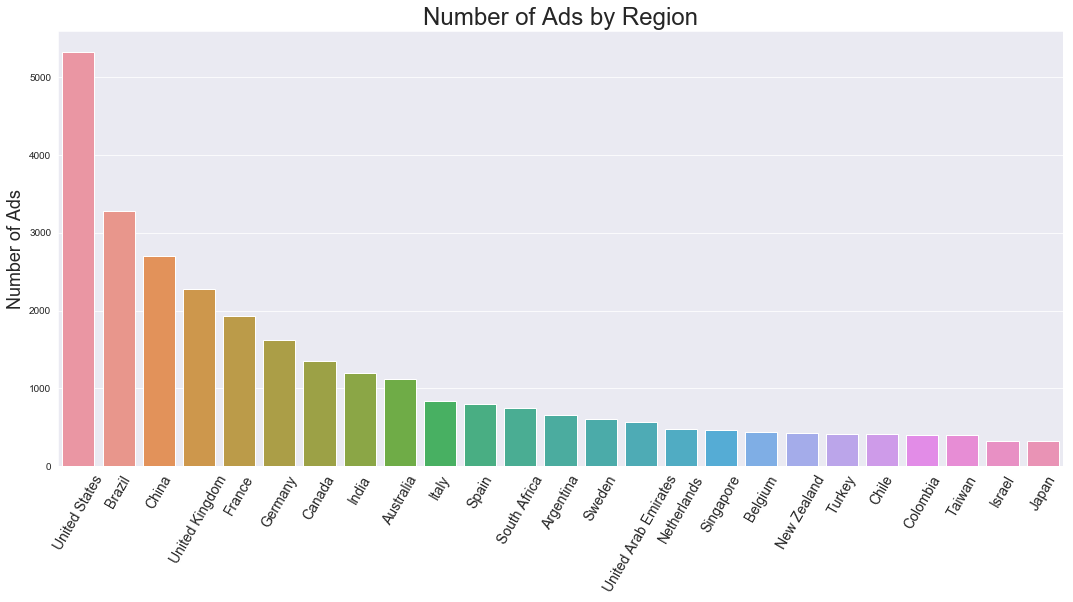

In [53]:
# ads by region
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
x = sns.barplot(top_countries.index, top_countries.values)
x.set_xticklabels(rotation=60, labels=top_countries.index, fontsize=14);
x.set_ylabel('Number of Ads', fontsize=18)
x.set_title('Number of Ads by Region', fontsize=24)
plt.savefig('ads_by_region_countplot.png')

In [54]:
# ads by brand
top_brands = final.brand.value_counts(ascending=False).head(25)
top_brands.index

Index(['Volkswagen', 'McDonald's', 'Nike', 'World Wildlife Fund (WWF)',
       'Amnesty International', 'Mercedes-Benz', 'IKEA', 'Samsung', 'Audi',
       'Toyota', 'Honda', 'Coca-Cola', 'Ford', 'Google', 'Sony', 'Nissan',
       'adidas', 'Heineken', 'Burger King', 'Fiat', 'Greenpeace', 'Renault',
       'BMW', 'Red Cross', 'Axe/Lynx'],
      dtype='object')

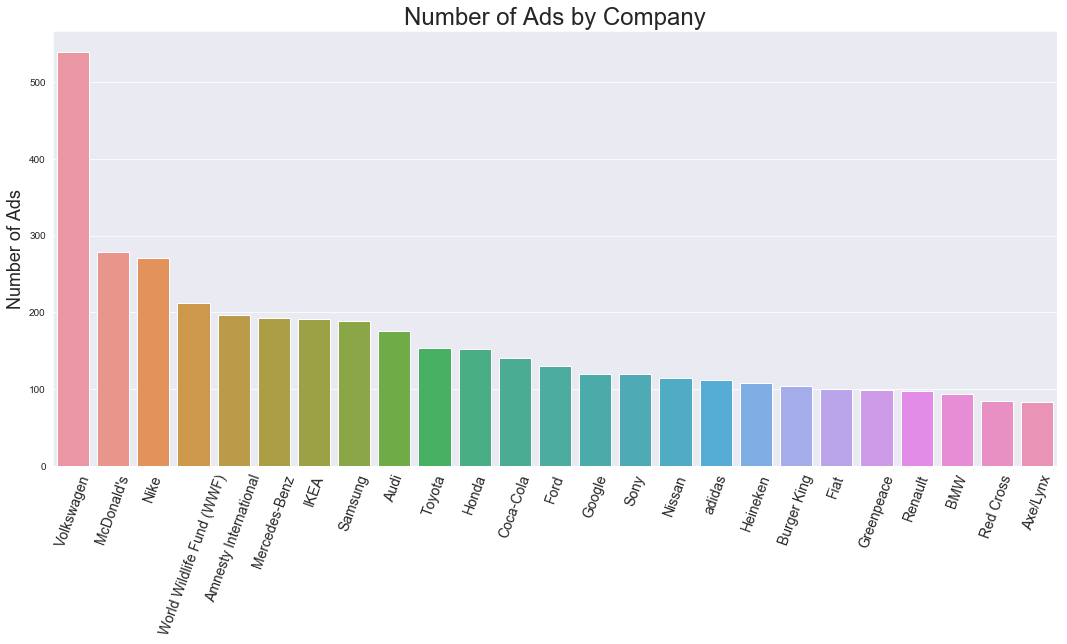

In [56]:
plt.figure(figsize=(18,8))
x = sns.barplot(top_brands.index, top_brands.values)
x.set_xticklabels(rotation=70, labels=top_brands.index, fontsize=14);
x.set_ylabel('Number of Ads', fontsize=18)
x.set_title('Number of Ads by Company', fontsize=24)
plt.savefig('ads_by_company_countplot.png')

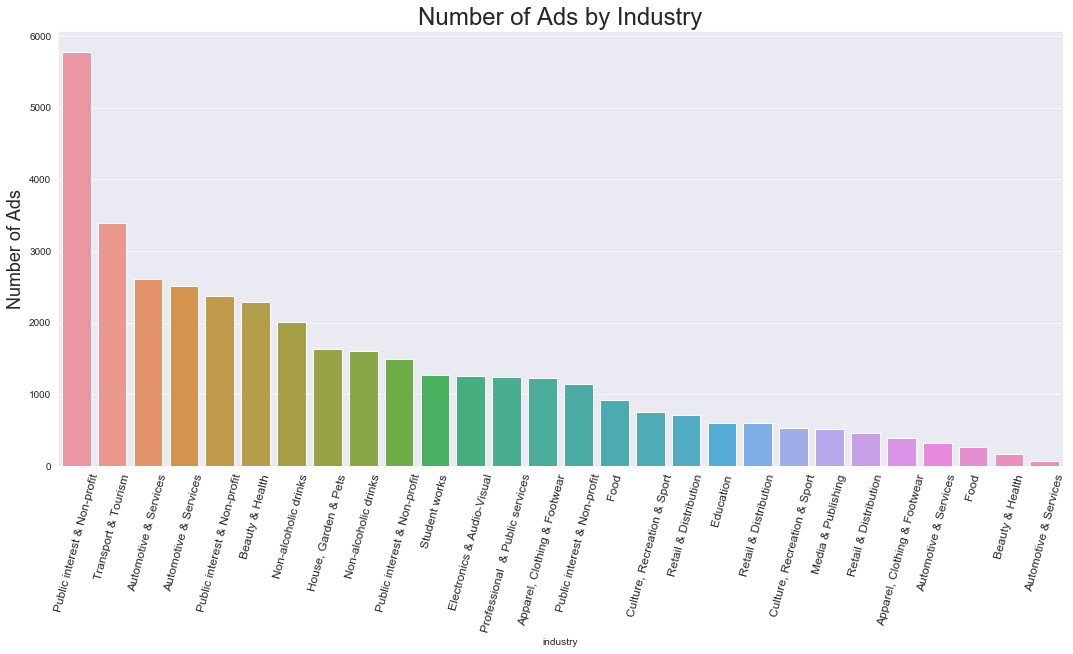

In [59]:
# ads by industry
plt.figure(figsize=(18,8))
x = sns.countplot(final.industry, order=final.industry.value_counts().index)
x.set_xticklabels(rotation=75, labels=final.industry, fontsize=12);
x.set_ylabel('Number of Ads', fontsize=18)
x.set_title('Number of Ads by Industry', fontsize=24)
plt.savefig('ads_by_industry_countplot.png')

## Text EDA

In [60]:
# importing some more libraries
from sklearn import feature_extraction

In [61]:
# removing everything but text to examine and target
from sklearn.feature_extraction.text import CountVectorizer
headlines = final[['headline', 'industry']]
headlines = headlines.dropna()
len(headlines)

25192

In [65]:
# splitting into feature and target
X = headlines.headline
y = headlines.industry

In [66]:
# word count vectors!
cv = CountVectorizer(stop_words = 'english')
counts = cv.fit_transform(X)
cv.vocabulary_

{'roger': 21180,
 'waters': 26987,
 'live': 15000,
 'paris': 18237,
 'nights': 17169,
 'concert': 6229,
 '699': 1138,
 'monday': 16452,
 '30': 750,
 '2011': 547,
 'accelerating': 1489,
 'future': 10777,
 'official': 17590,
 'ride': 21019,
 'spinfest': 23240,
 'amateur': 2150,
 'dj': 8044,
 'awards': 3014,
 'travelling': 25467,
 'fruits': 10667,
 'cause': 5039,
 'pollution': 19088,
 'think': 24904,
 'global': 11146,
 'eat': 8537,
 'local': 15050,
 'art': 2669,
 'beauty': 3415,
 'makes': 15471,
 'taste': 24541,
 'like': 14880,
 'friday': 10599,
 'seatbelt': 21893,
 'excuse': 9345,
 'fun': 10721,
 'officially': 17591,
 'licensed': 14813,
 'gala': 10808,
 'poster': 19216,
 'games': 10837,
 'xxi': 27966,
 'lotusiad': 15166,
 'soft': 22932,
 'new': 17095,
 'strong': 23777,
 'smoking': 22825,
 'garbage': 10854,
 'dump': 8412,
 'worst': 27509,
 'toxic': 25328,
 'products': 19572,
 'sound': 23073,
 'good': 11228,
 'look': 15122,
 'jacks': 13683,
 'paint': 18099,
 'numbers': 17416,
 'making': 15

In [67]:
# importing somre more librarires, removing stop words and tokenizing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = stopwords.words('english')
stop_words += ['1','2','3','4','5','6','7','8','9','0', '’']
words = X.ravel()
tokens = []
for word in words:
    token = word_tokenize(word)
    tokens+=token
stopped = [word for word in tokens if word not in stop_words]

In [68]:
# top words. Not too much that's surprising here
from collections import Counter
Counter(stopped).most_common(100)

[('new', 1300),
 ('dont', 1151),
 ('one', 1114),
 ('get', 989),
 ('life', 895),
 ('world', 886),
 ('like', 841),
 ('every', 811),
 ('time', 760),
 ('make', 748),
 ('help', 709),
 ('people', 701),
 ('day', 645),
 ('good', 623),
 ('us', 617),
 ('see', 589),
 ('never', 557),
 ('know', 537),
 ('take', 515),
 ('need', 514),
 ('let', 507),
 ('better', 500),
 ('go', 495),
 ('home', 484),
 ('way', 483),
 ('best', 447),
 ('want', 446),
 ('love', 436),
 ('find', 415),
 ('stop', 393),
 ('back', 385),
 ('years', 384),
 ('water', 374),
 ('even', 368),
 ('first', 363),
 ('children', 358),
 ('use', 357),
 ('year', 357),
 ('without', 355),
 ('car', 353),
 ('always', 349),
 ('keep', 342),
 ('everything', 341),
 ('come', 338),
 ('made', 333),
 ('real', 328),
 ('man', 322),
 ('free', 316),
 ('live', 312),
 ('give', 312),
 ('think', 310),
 ('would', 308),
 ('right', 305),
 ('drive', 301),
 ('work', 298),
 ('things', 297),
 ('big', 295),
 ('change', 291),
 ('power', 291),
 ('music', 285),
 ('save', 282),
 

In [73]:
# a bit more cleaning. Pesky symbols!
X = X.str.replace('’','')

In [74]:
# most common bigrams
from nltk.collocations import *
bigrams = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(stopped)
scored = finder.score_ngrams(bigrams.raw_freq)
scored[:100]

[(('dont', 'let'), 0.0009216366326307875),
 (('hong', 'kong'), 0.0007470107443428489),
 (('help', 'us'), 0.0005675341369358008),
 (('every', 'day'), 0.0005190269457447066),
 (('every', 'year'), 0.00041231112512429965),
 (('take', 'care'), 0.00034440105745676795),
 (('drink', 'drive'), 0.00027164027067012685),
 (('world', 'cup'), 0.00026193883243190804),
 (('breast', 'cancer'), 0.000237685236836361),
 (('domestic', 'violence'), 0.00023283451771725157),
 (('global', 'warming'), 0.00023283451771725157),
 (('new', 'year'), 0.00021343164124081396),
 (('one', 'day'), 0.00018917804564526691),
 (('dont', 'know'), 0.0001843273265261575),
 (('dont', 'want'), 0.0001794766074070481),
 (('make', 'difference'), 0.0001794766074070481),
 (('film', 'festival'), 0.00016977516916882927),
 (('make', 'sure'), 0.00016977516916882927),
 (('dont', 'drink'), 0.00016492445004971987),
 (('need', 'help'), 0.00016492445004971987),
 (('around', 'world'), 0.00016007373093061047),
 (('credit', 'card'), 0.000160073730

In [75]:
# most common trigrams
trigrams = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(stopped)
scored = finder.score_ngrams(trigrams.raw_freq)
scored[:100]

[(('submission', 'provided', 'longxi'), 0.00014552157357328223),
 (('dont', 'drink', 'drive'), 0.00014067085445417283),
 (('provided', 'longxi', '2007'), 0.00013096941621595402),
 (('dont', 'text', 'drive'), 9.216366326307876e-05),
 (('loving', 'china', 'win'), 9.216366326307876e-05),
 (('chinese', 'new', 'year'), 6.305934854842231e-05),
 (('stop', 'global', 'warming'), 5.820862942931289e-05),
 (('help', 'us', 'stop'), 5.335791031020349e-05),
 (('happy', 'new', 'year'), 4.850719119109408e-05),
 (('sony', 'full', 'hd'), 4.850719119109408e-05),
 (('world', 'tobacco', 'day'), 4.850719119109408e-05),
 (('body', 'meets', 'mind'), 4.365647207198467e-05),
 (('brother', 'creative', 'school'), 4.365647207198467e-05),
 (('buy', 'everything', 'else'), 4.365647207198467e-05),
 (('cant', 'buy', 'everything'), 4.365647207198467e-05),
 (('choose', 'make', 'difference'), 4.365647207198467e-05),
 (('difference', 'world', 'mountsinaiorg'), 4.365647207198467e-05),
 (('done', 'brother', 'creative'), 4.365

In [76]:
# briefly reintroducing description text to see if it could be usable or not
descriptions = final.description.dropna()
descriptions = descriptions.str.replace('‘','').str.replace('–','')
desc_words = descriptions.ravel()
desc_tokens = []
for word in desc_words:
    token = word_tokenize(word)
    desc_tokens+=token
desc_stopped = [word for word in desc_tokens if word not in stop_words]

In [77]:
# most common words
Counter(desc_stopped).most_common(100)

[('campaign', 13561),
 ('people', 11871),
 ('new', 10145),
 ('media', 8392),
 ('one', 7418),
 ('brand', 7082),
 ('world', 6096),
 ('created', 5141),
 ('social', 5124),
 ('time', 5021),
 ('first', 4900),
 ('also', 4814),
 ('way', 4767),
 ('film', 4036),
 ('make', 3957),
 ('every', 3905),
 ('could', 3861),
 ('like', 3832),
 ('would', 3803),
 ('us', 3594),
 ('create', 3543),
 ('million', 3481),
 ('strategy', 3433),
 ('life', 3425),
 ('day', 3366),
 ('audience', 3277),
 ('get', 3275),
 ('made', 3271),
 ('video', 3237),
 ('online', 3198),
 ('idea', 3154),
 ('around', 3140),
 ('experience', 3088),
 ('execution', 3050),
 ('creative', 3033),
 ('real', 2959),
 ('even', 2935),
 ('used', 2927),
 ('tv', 2914),
 ('women', 2893),
 ('help', 2822),
 ('brief', 2817),
 ('using', 2817),
 ('show', 2779),
 ('year', 2744),
 ('story', 2731),
 ('wanted', 2673),
 ('across', 2629),
 ('message', 2598),
 ('content', 2521),
 ('launch', 2508),
 ('target', 2459),
 ('use', 2458),
 ('design', 2452),
 ('advertising', 2

In [80]:
# most common brigrams
bigrams = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(desc_stopped)
scored = finder.score_ngrams(bigrams.raw_freq)
scored[:100]

[(('social', 'media'), 0.001188444233265318),
 (('brief', 'explanation'), 0.0007565379878111452),
 (('target', 'audience'), 0.0004734680948216744),
 (('new', 'york'), 0.000430782952228024),
 (('around', 'world'), 0.00039371427576511715),
 (('brief', 'client'), 0.0003532757196237642),
 (('describe', 'brief'), 0.00034822090010609507),
 (('first', 'time'), 0.0003285632686484929),
 (('campaign', 'description'), 0.0003021658778339986),
 (('raise', 'awareness'), 0.00029823435154247816),
 (('earned', 'media'), 0.00029317953202480905),
 (('description', 'synopsis'), 0.00026453555475801734),
 (('creative', 'execution'), 0.0002577957954011252),
 (('every', 'day'), 0.0002454395699134896),
 (('million', 'people'), 0.0002386998105565974),
 (('young', 'people'), 0.00022353535200359003),
 (('entry', 'summary'), 0.00020050784086754182),
 (('new', 'zealand'), 0.00019994619425446746),
 (('real', 'time'), 0.00019769960780217008),
 (('media', 'impressions'), 0.00019657631457602138),
 (('super', 'bowl'), 0

# More Data Cleaning

## Manually Updating Industries and Reducing Total Industries

In [81]:
final.industry.unique()

array(['Public interest & Non-profit', 'Transport & Tourism',
       'Automotive & Services', 'Beauty & Health', 'Non-alcoholic drinks',
       'House, Garden & Pets', 'Student works',
       'Electronics & Audio-Visual', 'Professional  & Public services',
       'Apparel, Clothing & Footwear', 'Food',
       'Culture, Recreation & Sport', 'Retail & Distribution',
       'Education', 'Media & Publishing', 'Catering industry',
       'Alcoholic drinks', 'Internet sites & Services',
       'Financial & Legal services', 'Toys & Games',
       'Confectionery & Snacks', 'Pharmaceutical', 'Miscellaneous',
       'Corporate self-promo', 'Office equipment',
       'Industrial & Agricultural', 'Real estate', 'Personal accessories'],
      dtype=object)

In [82]:
# moving catering to food
final.loc[final.industry == 'Catering industry', 'industry'] ='Food'

In [83]:
# double checking this worked
final[final.industry == 'Catering industry'].brand.unique()

array([], dtype=object)

In [84]:
# saving just headlines to another variable
headlines = final.dropna(subset=['headline'])
headlines = headlines.drop('description', axis=1).reset_index(drop=True)
headlines.head()

,brand,country,medium,headline,industry
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism
1,Infiniti,United States,Print,accelerating the future,Automotive & Services
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health


In [85]:
# checking for then manually cleaning the ads labeled as student works
headlines[(headlines.industry == 'Student works') & (headlines.brand.notnull())].brand.value_counts()

Yahoo                           4
Baygon                          3
Corbis                          3
Metro                           3
Ryanair                         3
World Wildlife Fund (WWF)       2
Ardefor                         2
Caritas                         2
Dual Survival TV                1
Salvation Army Thrift Stores    1
French Road Safety              1
Tattoo Parlour                  1
Petfinder.com                   1
Duracell                        1
Ad Kicks                        1
Society Tea                     1
Spot Hero                       1
Colgate                         1
Sonnet Insurance                1
Skittles                        1
Festival El Chupete             1
Greenpeace                      1
Dr. Martens                     1
The Salvation Army              1
Tabasco                         1
Cielo                           1
IKEA                            1
FedEx                           1
Durex                           1
The North Face

In [86]:
# doing the same across several other industries
headlines.loc[headlines.brand == 'Yahoo', 'industry'] = 'Internet sites & Services'

In [87]:
headlines.loc[headlines.brand == 'Ryanair', 'industry'] = 'Transport & Tourism'

In [88]:
headlines.loc[headlines.brand == 'Corbis', 'industry'] = 'Professional & Public services'

In [89]:
headlines[headlines.brand == 'Corbis']

,brand,country,medium,headline,industry
824,Corbis,Portugal,Print,search inspiration,Professional & Public services
3237,Corbis,Portugal,Print,find the image you have in mind,Professional & Public services
4654,Corbis,NaN,Print,lets face it fellows the last days of text for...,Professional & Public services
6052,Corbis,NaN,Print,cmon guys how many ads more can the before and...,Professional & Public services
6067,Corbis,China,Print,headlinecan the newspaper be heard visual info...,Professional & Public services
6335,Corbis,NaN,Print,hey weve all done the whole campaign with one ...,Professional & Public services
11935,Corbis,China,Print,headlinecan the internet be heard visual infor...,Professional & Public services
17395,Corbis,China,Print,headlinecan sport be heard visual information ...,Professional & Public services
18825,Corbis,Portugal,Print,leave your mark in cannes one way or the other...,Professional & Public services


In [90]:
# some values had 'headline' text included
headlines.headline = headlines.headline.str.replace('headline','')

In [91]:
headlines[headlines.brand == 'Metro']

,brand,country,medium,headline,industry
241,Metro,Spain,TV & Cinema,there is a place in madrid where you can move ...,Transport & Tourism
981,Metro,Netherlands,Print,bringing the world to you metro,Media & Publishing
1189,Metro,United Kingdom,Print,metro gossip on the go,Media & Publishing
3978,Metro,Brazil,Print,only two more days left for us until we begin ...,Media & Publishing
4283,Metro,Brazil,Print,someone needs to explain the everyday nonsense,Media & Publishing
7005,Metro,Spain,Print,daily information you should know,Media & Publishing
7038,Metro,Russia,Outdoor,freshness wholesale,Retail & Distribution
9525,Metro,Sweden,Print,read more know more live more,Media & Publishing
9807,Metro,Sweden,Print,from early morning till late at night well kee...,Media & Publishing
9916,Metro,France,Print,think for yourself metro just facts,Media & Publishing


In [92]:
# more manual industry cleaning
headlines.loc[headlines.brand == 'Baygon', 'industry'] = 'House, Garden & Pets'

In [93]:
headlines.loc[headlines.brand == 'World Wildlife Fund (WWF)', 'industry'] = 'Public interest & Non-profit'

In [94]:
headlines.loc[headlines.brand == 'Society Tea', 'industry'] = 'Non-alcoholic drinks'

In [95]:
headlines.loc[headlines.brand == 'Sonnet Insurance']

,brand,country,medium,headline,industry
964,Sonnet Insurance,United States,Cyber,the optimist we need and always deserved,Student works


In [96]:
headlines.loc[headlines.brand == 'Sonnet Insurance', 'industry'] = 'Financial & Legal services'

In [97]:
headlines.loc[headlines.brand == 'Dixie', 'industry'] = 'Retail & Distribution'

In [98]:
headlines.loc[headlines.brand == 'Tabasco', 'industry'] = 'Food'

In [99]:
headlines.loc[headlines.brand == 'Faber-Castell', 'industry'] = 'Office equipment'

In [100]:
headlines.loc[headlines.brand == 'Red Cross', 'industry'] = 'Public interest & Non-profit'

In [101]:
headlines.loc[headlines.brand == 'Durex', 'industry'] = 'Beauty & Health'

In [102]:
headlines.loc[headlines.brand == 'Greenpeace', 'industry'] = 'Public interest & Non-profit'

In [103]:
headlines.loc[headlines.brand == 'The North Face','industry'] = 'Apparel, Clothing & Footwear'

In [104]:
headlines.loc[headlines.brand == 'IKEA', 'industry'] = 'House, Garden & Pets'

In [105]:
headlines.loc[headlines.brand == 'French Road Safety', 'industry'] = 'Public interest & Non-profit'

In [106]:
headlines.loc[headlines.brand == 'Spot Hero', 'industry'] = 'Transport & Tourism'

In [107]:
headlines.loc[headlines.brand == 'Colgate', 'industry'] = 'Beauty & Health'

In [108]:
headlines.loc[headlines.brand == 'Skittles', 'industry'] = 'Confectionery & Snacks'

In [109]:
headlines.loc[headlines.brand == 'Honest Tea', 'industry'] = 'Non-alcoholic drinks'

In [110]:
headlines.loc[headlines.brand == 'Dr. Martens', 'industry'] = 'Apparel, Clothing & Footwear'

In [111]:
headlines.loc[headlines.brand == 'Petfinder.com', 'industry'] = 'House, Garden & Pets'

In [112]:
headlines.loc[headlines.brand == 'FedEx', 'industry'] = 'Professional & Public services'

In [113]:
headlines.loc[headlines.brand == 'Tattoo Parlour', 'industry'] = 'Beauty & Health'

In [114]:
headlines.loc[headlines.brand == 'The Salvation Army', 'industry'] = 'Public interest & Non-profit'

In [115]:
headlines.loc[headlines.brand == 'Salvation Army Thrift Stores', 'industry'] = 'Public interest & Non-profit'

In [116]:
headlines.loc[headlines.brand == 'Duracell', 'industry'] = 'Electronics & Audio-Visual'

In [117]:
headlines = headlines.drop(headlines[headlines.industry == 'Student works'].index)

In [118]:
len(headlines) - len(headlines[headlines.industry == 'Student works'])

25067

In [119]:
headlines[(headlines.industry == 'Miscellaneous') & (headlines.brand.notnull())].brand.value_counts()

7-Eleven                                       8
Caltex                                         6
Army Recruitment                               5
The Evangelical Lutheran Church of Finland     3
Hertfordshire Constabulary                     3
Aquila Heights                                 3
GP                                             3
Nippon                                         2
Raid                                           2
Ricoh                                          2
Fujifilm                                       2
UPS                                            2
Sanctuary Cove                                 2
Grey Cells                                     2
Polaroid                                       2
Somarec                                        2
Human Village                                  1
Stihl                                          1
HSBC                                           1
Dometic                                        1
XBats               

In [120]:
headlines.loc[headlines.brand == '7-Eleven', 'industry'] = 'Retail & Distribution'

In [121]:
headlines.loc[headlines.brand == 'Caltex', 'industry'] = 'Automotive & Services'

In [122]:
headlines.loc[headlines.brand == 'Army Recruitment', 'industry'] = 'Public interest & Non-profit'

In [123]:
headlines = headlines.drop_duplicates(subset = ['headline'])

In [124]:
headlines.loc[headlines.brand == 'GP', 'industry'] = 'Professional & Public services'

In [125]:
headlines.loc[headlines.brand == 'The Evangelical Lutheran Church of Finland', 'industry'] = 'Public interest & Non-profit'

In [126]:
headlines.loc[headlines.brand == 'Hertfordshire Constabulary', 'industry'] = 'Public interest & Non-profit'

In [127]:
headlines.loc[headlines.brand == 'UPS', 'industry'] = 'Professional & Public services'

In [128]:
headlines.loc[headlines.brand == 'Somarec', 'industry'] = 'Automotive & Services'

In [129]:
headlines.loc[headlines.brand == 'Fujifilm', 'industry'] = 'Electronics & Audio-Visua'

In [130]:
headlines.loc[headlines.brand == 'Ricoh', 'industry'] = 'Electronics & Audio-Visual'

In [131]:
headlines.loc[headlines.brand =='Sanctuary Cove', 'industry'] = 'Public interest & Non-profit'

In [132]:
headlines.loc[headlines.brand == 'Nippon', 'industry'] = 'House, Garden & Pets'

In [133]:
headlines.loc[headlines.brand == 'Polaroid', 'industry'] = 'Electronics & Audio-Visual'

In [134]:
headlines.loc[headlines.brand == 'Raid', 'industry'] = 'House, Garden & Pets'

In [135]:
headlines.loc[headlines.brand == 'XBats', 'industry'] = 'Culture, Recreation & Sport'

In [136]:
headlines.loc[headlines.brand == 'Norwegian Snowboard Association', 'industry'] = 'Culture, Recreation & Sport'

In [137]:
headlines.loc[headlines.brand == 'Adobe', 'industry'] = 'Internet sites & Services'

In [138]:
headlines.loc[headlines.brand == 'Fontshop', 'industry'] = 'Professional  & Public services'

In [139]:
headlines.loc[headlines.brand == 'Adinfinitum', 'industry'] = 'Professional  & Public services'

In [140]:
headlines.loc[headlines.brand == 'The Young Ones', 'industry'] = 'Professional  & Public services'

In [141]:
headlines.loc[headlines.brand == 'Compaq', 'industry'] = 'Electronics & Audio-Visual'

In [142]:
headlines.loc[headlines.brand == 'Moviliza', 'industry'] = 'Professional  & Public services'

In [143]:
headlines.loc[headlines.brand == 'Milk', 'industry'] = 'Food'

In [144]:
headlines.loc[headlines.industry == 'Food & ', 'industry'] = 'Food & Beverages'

In [145]:
headlines.loc[headlines.industry == 'Food', 'industry'] = 'Food & Beverages'

In [146]:
len(headlines.loc[headlines.industry == 'Food & Beverages'])

1277

In [147]:
headlines.loc[headlines.brand == 'Zippo', 'industry'] = 'Personal accessories'

In [148]:
headlines.loc[headlines.brand == 'HSBC', 'brand'] = 'Financial & Legal services'

In [149]:
headlines = headlines.drop(headlines[headlines.industry == 'Miscellaneous'].index)

In [150]:
len(headlines[headlines.industry == 'Personal accessories'])

232

In [151]:
# creating new industry combining some others
headlines.loc[headlines.industry == 'Apparel, Clothing & Footwear', 'industry'] = 'Apparel, Clothing, Footwear & Accessories'

In [152]:
headlines[headlines.industry == 'Personal accessories'].brand.value_counts()

Ray-Ban                     8
Cam                         6
Zippo                       5
Kinesio                     5
Louis Vuitton               5
Ozeal                       4
Aparecida Jewellery         4
Bagues Jewelry              3
Legacy                      3
3M                          3
Hermès                      3
Jeff Cooper Designs         3
Lazer                       3
Metrokane                   3
Braun                       3
Braun Buffel                3
Zildjian                    2
Lawrence & Mayo             2
GrandOptical                2
Stupid Cupid                2
Oxydo                       2
Samsonite                   2
Bausch & Lomb               2
Funk                        2
Weatherby                   2
Jota                        2
Pilot                       2
Venture                     2
IWC                         2
Esotika                     2
                           ..
Eastpak                     1
Anjuss                      1
Amboss    

In [153]:
headlines.loc[headlines.brand == 'Ray-Ban', 'industry'] = 'Apparel, Clothing, Footwear & Accessories'

In [154]:
headlines.loc[headlines.industry == 'Personal accessories', 'industry'] = 'Apparel, Clothing, Footwear & Accessories'

In [155]:
headlines.industry.unique()

array(['Transport & Tourism', 'Automotive & Services',
       'Public interest & Non-profit', 'Beauty & Health',
       'Non-alcoholic drinks', 'Confectionery & Snacks',
       'Professional  & Public services',
       'Apparel, Clothing, Footwear & Accessories', 'Education',
       'Retail & Distribution', 'Culture, Recreation & Sport',
       'Media & Publishing', 'Food & Beverages', 'Alcoholic drinks',
       'Financial & Legal services', 'Electronics & Audio-Visual',
       'House, Garden & Pets', 'Pharmaceutical', 'Office equipment',
       'Toys & Games', 'Industrial & Agricultural',
       'Corporate self-promo', 'Real estate', 'Internet sites & Services',
       'Professional & Public services', 'Electronics & Audio-Visua'],
      dtype=object)

In [156]:
# checking for new value counts of industry
headlines.industry.value_counts()

Public interest & Non-profit                 3881
Automotive & Services                        2316
House, Garden & Pets                         1641
Media & Publishing                           1609
Professional  & Public services              1528
Culture, Recreation & Sport                  1392
Electronics & Audio-Visual                   1325
Food & Beverages                             1277
Apparel, Clothing, Footwear & Accessories    1154
Beauty & Health                              1117
Retail & Distribution                         825
Financial & Legal services                    776
Transport & Tourism                           766
Non-alcoholic drinks                          760
Pharmaceutical                                730
Alcoholic drinks                              688
Education                                     452
Corporate self-promo                          416
Confectionery & Snacks                        405
Industrial & Agricultural                     390


In [157]:
headlines.loc[headlines.industry == 'Electronics & Audio-Visua', 'industry'] = 'Electronics & Audio-Visual'

In [158]:
headlines.loc[headlines.industry == 'Professional  & Public services', 'industry'] = 'Professional & Public services'

In [159]:
headlines.loc[headlines.industry == 'Corporate self-promo', 'brand'].value_counts()

JWT                                      12
WELOVEAD                                  7
McCann Erickson                           6
Nike                                      6
BBDO                                      5
Noah's Ark Creative                       4
Publicis                                  4
BDDP & Fils                               4
Kaffeine                                  4
Pencil Wings                              4
Yellow Pages                              3
TBWA                                      3
SO&U                                      3
Icon Cosmetics Megastore                  3
Verdant Zeal                              3
Milc                                      3
Der Doctor Guerrilla                      3
DDB                                       3
CentrespreadGREY                          3
Reichl und Partner                        3
Standard Chartered                        3
AMNEWTON21                                3
Saatchi & Saatchi               

In [160]:
pd.set_option('display.max_colwidth', 250)
headlines.loc[headlines.brand == 'JWT', 'industry'] = 'Professional & Public services'

In [161]:
headlines.loc[headlines.brand == 'Nike', 'industry'] = 'Apparel, Clothing, Footwear & Accessories'

In [162]:
headlines.loc[headlines.brand == 'Kaffeine', 'industry'] = 'Professional & Public services'

In [163]:
headlines.loc[headlines.brand == 'BDDP & Fils', 'industry'] = 'Professional & Public services'

In [164]:
headlines.loc[headlines.industry == 'Corporate self-promo', 'industry'] = 'Professional & Public services'

In [165]:
headlines.loc[headlines.industry == 'Confectionery & Snacks', 'industry'] = 'Food & Beverages'

In [166]:
headlines.loc[headlines.industry == 'Real estate']

,brand,country,medium,headline,industry
115,NaN,China,Print,to highlight its proximity to various parts of towneach page talked about how little it would take to get therebut instead of minutes it used horse to represent one minute to coincide with the location horse bay left top one minute equals to one ...,Real estate
265,RemaxVip,Turkey,Print,you enjoy we are doing,Real estate
588,Obos,Norway,Print,in the last 75 years we have built 80000 homes for all kinds of people all over oslo,Real estate
747,JBI,United Arab Emirates,Print,experts in tailormade real estate solutions,Real estate
1040,NaN,China,Print,a 3 million square meter residential community comes to towneverything is small in comparison,Real estate
1231,NaN,China,Print,greeting a new initiative in warm town theres courtesy theres respect theres warmth but theres nothing to intrude your privacy,Real estate
2647,NaN,China,Print,a slope with two views of lives。 one is admiring life one is enjoying life,Real estate
3283,NaN,China,Print,spanish style community has been delivered to you,Real estate
3639,San Li Tun Village,China,Outdoor,lets play xxl,Real estate
3733,NaN,China,Print,open the door to see china live in china,Real estate


# EDA Post Manual Cleaning

## Briefly Repeating Same Steps Done Before

In [167]:
# checking counts and null values after manual cleaning
headlines.industry.value_counts()

Public interest & Non-profit                 3881
Automotive & Services                        2316
Professional & Public services               1970
Food & Beverages                             1682
House, Garden & Pets                         1641
Media & Publishing                           1608
Culture, Recreation & Sport                  1384
Electronics & Audio-Visual                   1334
Apparel, Clothing, Footwear & Accessories    1169
Beauty & Health                              1117
Retail & Distribution                         825
Financial & Legal services                    776
Transport & Tourism                           766
Non-alcoholic drinks                          760
Pharmaceutical                                730
Alcoholic drinks                              688
Education                                     452
Industrial & Agricultural                     390
Toys & Games                                  288
Internet sites & Services                     232


In [168]:
headlines.isnull().sum()

brand       4673
country     1021
medium        14
headline       0
industry       0
dtype: int64

In [169]:
headlines.medium.value_counts()

Print                    18791
TV & Cinema               2531
Outdoor                   1464
Ambient & Interactive      746
Cyber                      336
Direct Market              223
Promotion & Event           55
Radio                       34
Design & Branding           33
Miscellaneous                5
Name: medium, dtype: int64

In [170]:
# seeing how many nulls for just print
headlines[headlines.medium == 'Print'].isnull().sum()

brand       4009
country      812
medium         0
headline       0
industry       0
dtype: int64

In [171]:
headlines.industry.value_counts()

Public interest & Non-profit                 3881
Automotive & Services                        2316
Professional & Public services               1970
Food & Beverages                             1682
House, Garden & Pets                         1641
Media & Publishing                           1608
Culture, Recreation & Sport                  1384
Electronics & Audio-Visual                   1334
Apparel, Clothing, Footwear & Accessories    1169
Beauty & Health                              1117
Retail & Distribution                         825
Financial & Legal services                    776
Transport & Tourism                           766
Non-alcoholic drinks                          760
Pharmaceutical                                730
Alcoholic drinks                              688
Education                                     452
Industrial & Agricultural                     390
Toys & Games                                  288
Internet sites & Services                     232


In [172]:
headlines.headline = headlines.headline.str.replace('‘','').str.replace('’','')

In [175]:
# checkpointing and exporting data to be analyzed further in a new notebook
headlines.to_csv('headlines_df.csv', index=False)